## Tasca M4 T02

### Exercici 1
***
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.


Fet al arxiu '03 EXAMINING DATA.ipynb'


### Exercici 2
***
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

**Important**

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [16]:
import pandas as pd
import numpy as mp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Obrim el dataset

df = pd.read_csv('movies.dat', header=None, sep='::', names=['ID','Title','Genre'],
                 engine='python', encoding='latin-1')

df

,ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [17]:
# Explorar el dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [18]:
# Mirar si hi ha valors nuls i/o duplicats

df.isnull().sum()

ID       0
Title    0
Genre    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
# Crear la nova columna i omplirla amb l'any

df['Year'] = df['Title'].str.extract(r'\((\d{4})\)').astype(int)

df

,ID,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [21]:
# Borrar l'any de la columna 'Title'

df['Title'] = df['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip() # He afegit regex=true 
                                                                                # perquè sino donava error

df

,ID,Title,Genre,Year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [22]:
# Separem els gèneres i escollim nomès el primer


df['Genre'] = df['Genre'].str.split('|')

df['Genre'] = df['Genre'].str[0]

df

,ID,Title,Genre,Year
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genre   3883 non-null   object
 3   Year    3883 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 106.3+ KB


In [24]:
# Eliminem la columns ID, ja que nomès ens demanen 'Title', 'Genre' i 'Year'

df = df.drop('ID', axis=1)

df

,Title,Genre,Year
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


Ja tenim el dataset que voliem.

### Exercici 3
***
Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

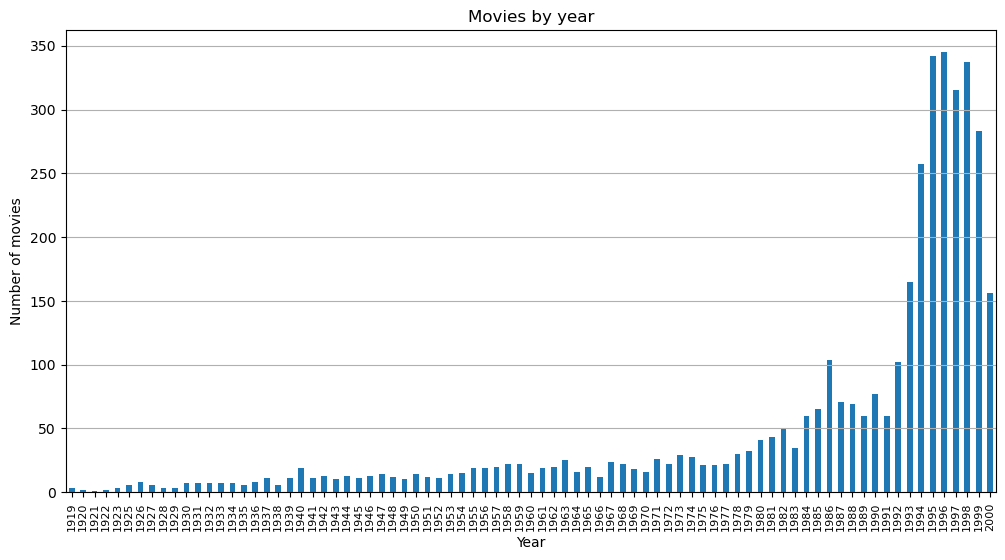

In [25]:
df_year = df['Year'].value_counts().sort_index()

df_year.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Movies by year')

plt.xticks(rotation=90, fontsize=8)
plt.grid(True, axis='y')

plt.show()

En aquest gràfic podem veure el nombre de pel·lícules per any. Com podem observar, a partir dels anys 80 la producció creix considerablement i a partir dels anys 90 augmenta exponencialment, segurament per les millores tecnòlogiques, l'abaratiment dels costos i la seva total implantació com a oci de consum.

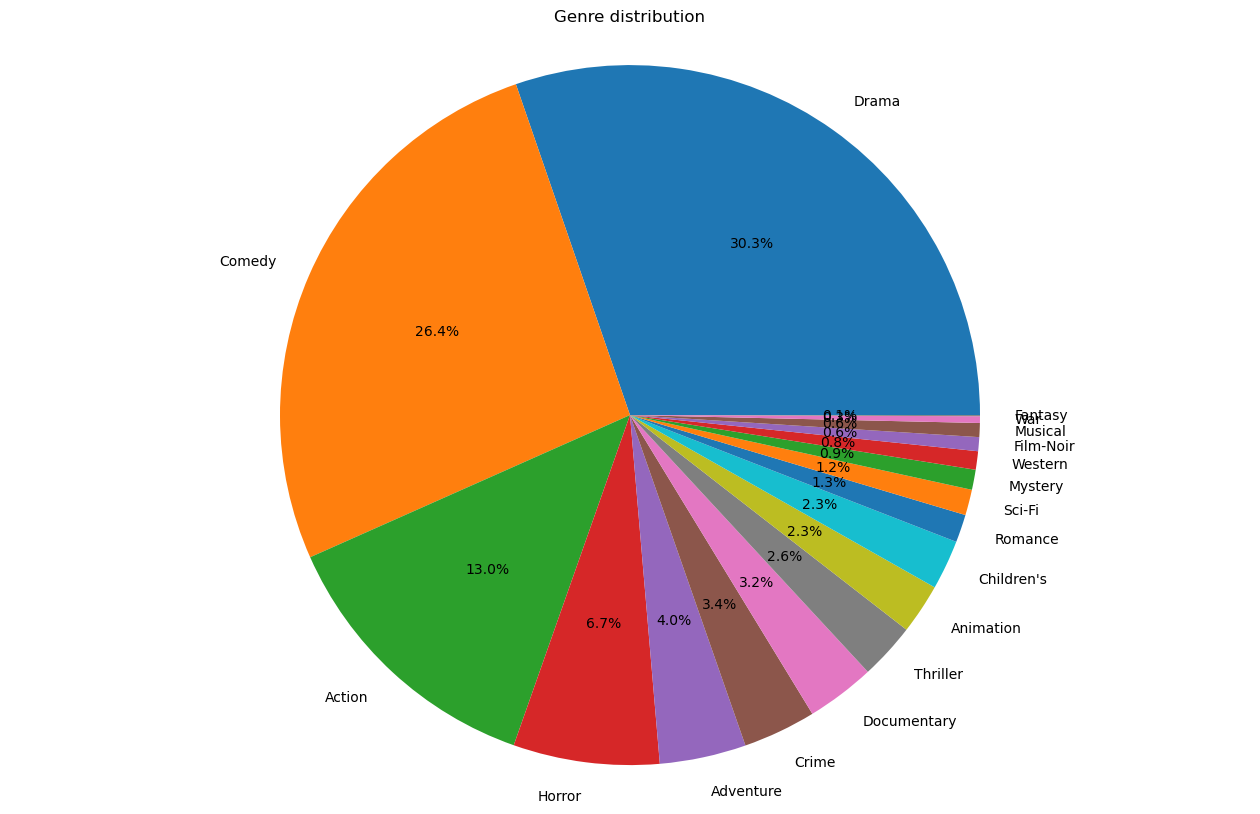

In [15]:
df_genre = df['Genre'].value_counts()

plt.figure(figsize=(16, 10))

plt.pie(df_genre, labels=df_genre.index, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Genre distribution')

plt.show() # No he aconseguit que no es superposin les etiquetes entre si

En aquest gràfic observem la distribució de les pel·lícules segons el seu gènere, on més de la meitat pertanyen a dos grups: drama (30.3%) i comèdia (26,4%), amb una quota conjunta del 56.7%. Els segueixen els gèneres d'acció i terror, ja amb menor percentatge, i després tots els altres amb una disminució notoria de la seva quota.

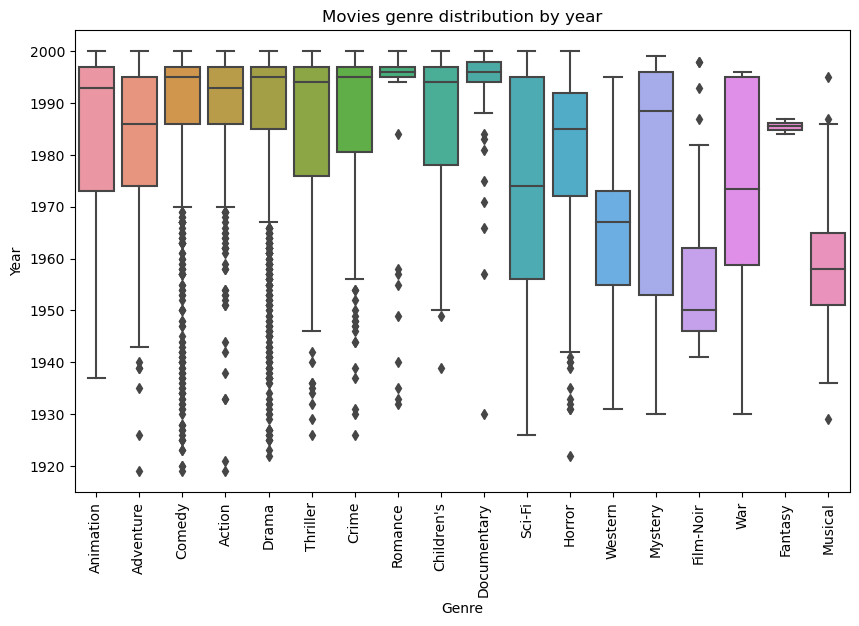

In [77]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Genre', y='Year')

plt.xlabel('Genre')
plt.ylabel('Year')
plt.title('Movies genre distribution by year')
plt.xticks(rotation=90)

plt.show()

En aquest gràfic podem observar la distribució dels gèneres de les pel·lícules segons els anys en els quals es van realitzar. Com es pot veure, els gèneres western, film-noir i musical van ser molt populars entre els anys 50 - 80 i després va disminuir la seva presència als cinemes considerablement.